# importing Libraries

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau

# Reading training data

In [2]:
dir = r"C:\Users\w20027087\Downloads\archive\dataset\Train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    print(os.listdir(dir))
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    print(sub_directory)
    for j in os.listdir(sub_directory):
        print(j,type(j))
        count+=1
        if count > 2000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\0
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>
10002.jpg

In [3]:
len(train_data)

70000

# Reading Validation data

In [4]:
val_dir = r"C:\Users\w20027087\Downloads\archive\Validation"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 100:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [5]:
len(val_data)

3500

In [6]:
random.shuffle(train_data)
random.shuffle(val_data)

In [7]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [8]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [9]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [10]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [11]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [12]:
print(train_X.shape,val_X.shape)

(70000, 32, 32, 1) (3500, 32, 32, 1)


In [13]:
print(train_Y.shape,val_Y.shape)

(70000, 35) (3500, 35)


In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# CNN Model

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [17]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

# Data Augumentation

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_X)

In [19]:
epochs = 25
batch_size=32


In [20]:
history = model.fit(datagen.flow(train_X,train_Y, batch_size=batch_size),
                              epochs = epochs, validation_data = (val_X,val_Y),
                              verbose = 1, steps_per_epoch=train_X.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/25
2187/2187 [==============================] - 60s 27ms/step - loss: 1.0119 - accuracy: 0.6856 - val_loss: 0.3549 - val_accuracy: 0.8674 - lr: 0.0010
Epoch 2/25
2187/2187 [==============================] - 63s 29ms/step - loss: 0.5038 - accuracy: 0.8282 - val_loss: 0.2925 - val_accuracy: 0.9051 - lr: 0.0010
Epoch 3/25
2187/2187 [==============================] - 66s 30ms/step - loss: 0.4147 - accuracy: 0.8567 - val_loss: 0.2554 - val_accuracy: 0.9134 - lr: 0.0010
Epoch 4/25
2187/2187 [==============================] - 64s 29ms/step - loss: 0.3727 - accuracy: 0.8696 - val_loss: 0.2718 - val_accuracy: 0.8946 - lr: 0.0010
Epoch 5/25
2187/2187 [==============================] - 64s 29ms/step - loss: 0.3427 - accuracy: 0.8787 - val_loss: 0.2325 - val_accuracy: 0.9214 - lr: 0.0010
Epoch 6/25
2187/2187 [==============================] - 66s 30ms/step - loss: 0.3239 - accuracy: 0.8848 - val_loss: 0.2496 - val_accuracy: 0.9183 - lr: 0.0010
Epoch 7/25
2187/2187 [========================

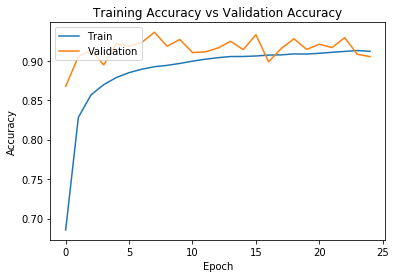

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

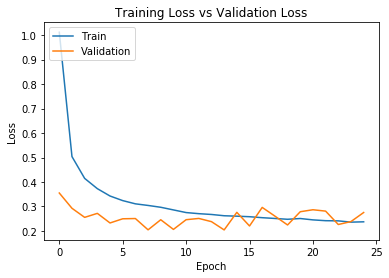

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [24]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [25]:
def get_word(letter):
    word = "".join(letter)
    return word

GEWDR0W


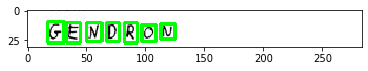

In [26]:
letter,image = get_letters(r"C:\Users\w20027087\Downloads\archive (1)\validation_v2\validation/VALIDATION_0154.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

LEC0MJE


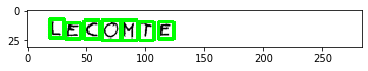

In [27]:
letter,image = get_letters(r"C:\Users\w20027087\Downloads\archive (1)\validation_v2\validation/VALIDATION_0350.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

EDBSAMG


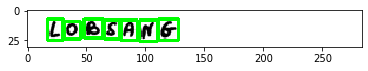

In [28]:
letter,image = get_letters(r"C:\Users\w20027087\Downloads\archive (1)\validation_v2\validation/VALIDATION_0305.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)